In [1]:
from models.vgg import BrainVGG
from models.ffnn import BrainFFNN
import matplotlib.pyplot as plt
import tensorflow as tf

2024-04-06 16:12:15.927238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 16:12:15.927309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 16:12:16.137574: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-06 16:12:16.347169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 16:12:17.735376: W tensorflow/compiler/tf2

In [2]:
vgg, ffnn = BrainVGG(), BrainFFNN()

2024-04-06 16:12:21.523966: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-06 16:12:21.883650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-06 16:12:21.883700: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-06 16:12:21.886195: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-06 16:12:21.886236: I external/local_xla/xla/stream_executor

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [3]:
ffnn.load(), vgg.load()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'ffnn-weights.keras', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

1/1 [==============================] - 3s 3s/step
FFNN:  [0. 0. 0. 1.] pituitary
VGG:  [5.5894017e-10 1.1917129e-04 4.0870148e-07 9.9988043e-01] pituitary
True: pituitary
FFNN:  [1.0000000e+00 1.2393022e-33 0.0000000e+00 0.0000000e+00] glioma
VGG:  [9.989458e-01 2.556589e-04 7.412367e-04 5.726443e-05] glioma
True: glioma
FFNN:  [2.2092064e-17 1.5846366e-01 8.4153640e-01 0.0000000e+00] notumor
VGG:  [5.8486480e-11 9.9999797e-01 2.0805660e-06 5.1847887e-11] meningioma
True: meningioma
FFNN:  [1.2682079e-10 9.0655360e-36 0.0000000e+00 1.0000000e+00] pituitary
VGG:  [1.8061870e-08 1.7898907e-03 1.0674625e-07 9.9820995e-01] pituitary
True: pituitary


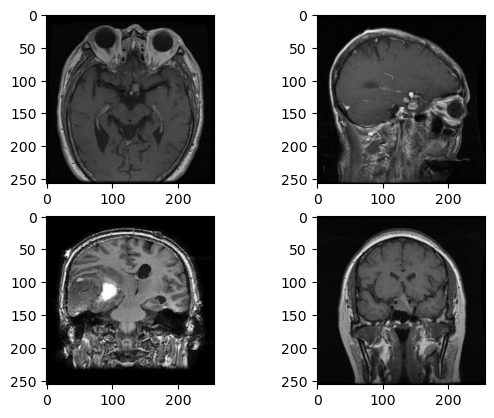

In [ ]:
xBatch = None
yBatch = None

for im, lbl in vgg.test_ds.take(1):
    xBatch = im
    yBatch = lbl

xBatch = xBatch.numpy()[:4]
yBatch = yBatch.numpy()[:4]

ffnnPred = ffnn.model.predict(xBatch)
vggPred = vgg.model.predict(xBatch)


fig, axs = plt.subplots(2, 2)

for i in range(4):
    axs[i // 2, i % 2].imshow(xBatch[i], cmap='gray')

    print('FFNN: ', ffnnPred[i], vgg.test_ds.class_names[tf.math.argmax(ffnnPred[i])], )

    print('VGG: ', vggPred[i], vgg.test_ds.class_names[tf.math.argmax(vggPred[i])])
    
    print('True: {}'.format(vgg.test_ds.class_names[yBatch[i]]))



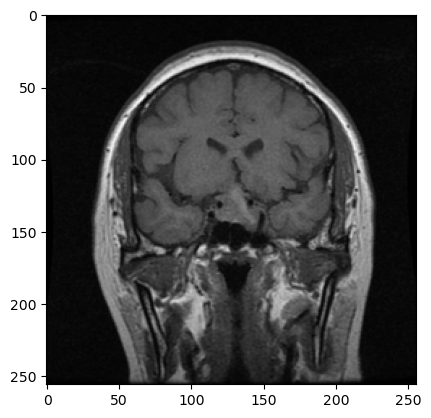

In [ ]:
for i in range(4):
    plt.imshow(xBatch[i], cmap='gray')
    plt.savefig('im-{}.png'.format(i))